# Adult Census Mini Project
#Exploring job roles and income levels for adults based on census responses.

In [10]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
df = pd.read_csv("adult_census_data.csv")

In [11]:
#exploring the df column titles
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [12]:
#dropping all rows from the (number) columns specified. axis is 1 to drop across columns
new_df = df.drop(df.loc[:,['39',' 77516',' 13',' 2174',' 0',' 40']],axis=1)
new_df.head()

,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [13]:
#renaming the existing columns to make more readable and applying this to the original new df. 
new_df.rename(columns = {' State-gov':'Employment_Type', ' Bachelors':'Degree_Status', ' Never-married':'Marriage_Status', ' Adm-clerical':'Job_Role', ' Not-in-family':'Family_Role', ' White':'Ethnicity', ' Male':'Gender', ' United-States':'Country', ' <=50K':'Earnings'}, inplace=True)
new_df.head()

,Employment_Type,Degree_Status,Marriage_Status,Job_Role,Family_Role,Ethnicity,Gender,Country,Earnings
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [43]:
#To determine the number of persons in each job group, we must count the Job Role column
new_df['Job_Role'].replace(' ?','Unknown')
count = new_df.value_counts('Job_Role')
count

Job_Role
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
Unknown               1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
dtype: int64

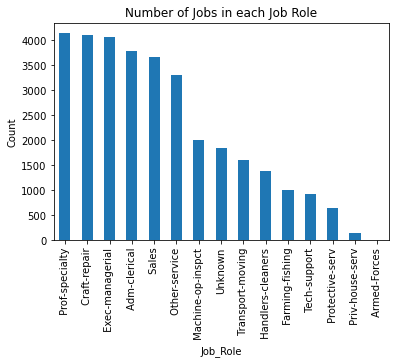

In [44]:
count.plot(kind='bar',title='Number of Jobs in each Job Role')
plt.ylabel('Count')
plt.savefig('MI_pic1')
plt.show()

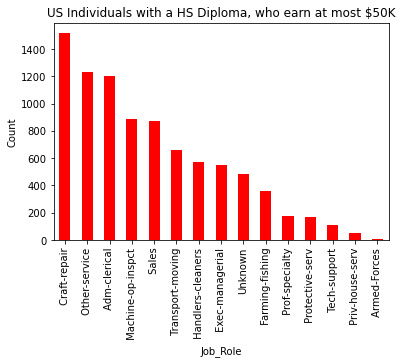

In [45]:
#Creating a filter for HS grads and at most 50K income
HS = new_df['Degree_Status']==' HS-grad'
Low = new_df['Earnings']==' <=50K'
filter1 = new_df[HS & Low]
filter1
count1 = filter1.value_counts('Job_Role')
count1
count1.plot(kind='bar',title='US Individuals with a HS Diploma, who earn at most $50K',color='r')
plt.xlabel('Job_Role')
plt.ylabel('Count')
plt.savefig('MI_pic2')
plt.show()

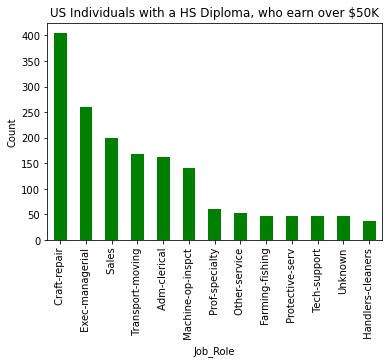

In [46]:
#creating a filter for HS grads and over 50K
High = new_df['Earnings']==' >50K'
filter2 = new_df[HS & High]
filter2
count2 = filter2.value_counts('Job_Role')
count2
count2.plot(kind='bar',title='US Individuals with a HS Diploma, who earn over $50K',color='g')
plt.xlabel('Job_Role')
plt.ylabel('Count')
plt.savefig('MI_pic3')
plt.show()

<H2> Challenge Question </H2>

<b> Q5. Which Job Role has the highest <i> proportion </i> of individuals who earn >50K? </b>

In [49]:
#Filtering out the highest Job Role Count (earning over 50k) as a Proportion
Proportion = filter2.Job_Role
count3 = Proportion.value_counts(normalize=True).sort_values(ascending=False)
count3.head(1)

 Craft-repair    0.241791
Name: Job_Role, dtype: float64